In [363]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell

In [364]:
pd.options.display.max_rows = 25
InteractiveShell.ast_node_interactivity = "all"

In [365]:
## Reading users data

In [366]:
%%bash
head u.user

1|24|M|technician|85711
2|53|F|other|94043
3|23|M|writer|32067
4|24|M|technician|43537
5|33|F|other|15213
6|42|M|executive|98101
7|57|M|administrator|91344
8|36|M|administrator|05201
9|29|M|student|01002
10|53|M|lawyer|90703


In [367]:
## read user data into data-frame

user_cols = ['user_id', 'age', 'sex',
             'occupation', 'zip_cpde']
users = pd.read_csv('u.user',
                   sep='|',
                   encoding='latin-1',
                   names=user_cols)

In [368]:
users.shape
users.size
users.info()
users.isnull().any()
users.head()

(943, 5)

4715

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
sex           943 non-null object
occupation    943 non-null object
zip_cpde      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB


user_id       False
age           False
sex           False
occupation    False
zip_cpde      False
dtype: bool

user_id  age sex  occupation zip_cpde
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067
3        4   24   M  technician    43537
4        5   33   F       other    15213

In [369]:
## Reading Rating Data

In [370]:
%%bash
head u.data

196	242	3	881250949
186	302	3	891717742
22	377	1	878887116
244	51	2	880606923
166	346	1	886397596
298	474	4	884182806
115	265	2	881171488
253	465	5	891628467
305	451	3	886324817
6	86	3	883603013


In [371]:
ratings_cols = ['user_id', 'movie_id', 
                'rating', 'unix_timestamp']

ratings = pd.read_csv('u.data',
                     sep='\t',
                     names=ratings_cols)

In [372]:
ratings.shape
ratings.info()
ratings.isnull().any()
ratings.head()

(100000, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user_id           100000 non-null int64
movie_id          100000 non-null int64
rating            100000 non-null int64
unix_timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


user_id           False
movie_id          False
rating            False
unix_timestamp    False
dtype: bool

user_id  movie_id  rating  unix_timestamp
0      196       242       3       881250949
1      186       302       3       891717742
2       22       377       1       878887116
3      244        51       2       880606923
4      166       346       1       886397596

In [373]:
## reading movies data

In [374]:
%%bash
head -2 u.item

1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0
2|GoldenEye (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?GoldenEye%20(1995)|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0


In [375]:
## since i am interested in first five columns
movie_cols = ['movie_id', 'name', 'release_date',
              'video_release_date', 'imdb_url']
movies = pd.read_csv('u.item',
                     sep='|',
                     names=movie_cols,
                     usecols=range(5),
                     encoding='latin-1')


In [376]:
movies.shape
movies.info()
movies.isnull().any()
movies.head()

(1682, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 5 columns):
movie_id              1682 non-null int64
name                  1682 non-null object
release_date          1681 non-null object
video_release_date    0 non-null float64
imdb_url              1679 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 65.8+ KB


movie_id              False
name                  False
release_date           True
video_release_date     True
imdb_url               True
dtype: bool

movie_id               name release_date  video_release_date  \
0         1   Toy Story (1995)  01-Jan-1995                 NaN   
1         2   GoldenEye (1995)  01-Jan-1995                 NaN   
2         3  Four Rooms (1995)  01-Jan-1995                 NaN   
3         4  Get Shorty (1995)  01-Jan-1995                 NaN   
4         5     Copycat (1995)  01-Jan-1995                 NaN   

                                            imdb_url  
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...  
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...  
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...  
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...  
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)

In [377]:
## sample checking merge

x_users = users.head()
# x_users
x_movies = movies.head()
# x_movies
x_ratings = ratings
# x_ratings.head()

um = pd.merge(x_ratings, x_users, on='user_id')
rs = pd.merge(um, x_movies, on='movie_id')

# The result is minimun rows because i use head 

rs

user_id  movie_id  rating  unix_timestamp  age sex  occupation zip_cpde  \
0        5         2       3       875636053   33   F       other    15213   
1        1         2       3       876893171   24   M  technician    85711   
2        5         1       4       875635748   33   F       other    15213   
3        1         1       5       874965758   24   M  technician    85711   
4        2         1       4       888550871   53   F       other    94043   
5        1         5       3       889751712   24   M  technician    85711   
6        1         4       3       876893119   24   M  technician    85711   
7        1         3       4       878542960   24   M  technician    85711   

                name release_date  video_release_date  \
0   GoldenEye (1995)  01-Jan-1995                 NaN   
1   GoldenEye (1995)  01-Jan-1995                 NaN   
2   Toy Story (1995)  01-Jan-1995                 NaN   
3   Toy Story (1995)  01-Jan-1995                 NaN   
4   Toy Story (1995)  01-Jan-1995                 NaN   
5     Copycat (1995)  01-Jan-1995                 NaN   
6  Get Shorty (1995)  01-Jan-1995                 NaN   
7  Four Rooms (1995)  01-Jan-1995                 NaN   

                                            imdb_url  
0  http://us.imdb.com/M/title-exact?GoldenEye%20(...  
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...  
2  http://us.imdb.com/M/title-exact?Toy%20Story%2...  
3  http://us.imdb.com/M/title-exact?Toy%20Story%2...  
4  http://us.imdb.com/M/title-exact?Toy%20Story%2...  
5  http://us.imdb.com/M/title-exact?Copycat%20(1995)  
6  http://us.imdb.com/M/title-exact?Get%20Shorty%...  
7  http://us.imdb.com/M/title-exact?Four%20Rooms%...

### Merge all three dataframes (users, movies, ratings)
* steps
* merge `ratings`(100000 rows) and `users`(943 rows) with column-name `user_id`
* merge `result of step1` and `movies`(1682 rows) with column-name `movie_id`

In [378]:
ratings_users = pd.merge(ratings, users, on='user_id')
dataset = pd.merge(ratings_users, movies, on='movie_id')

In [379]:
dataset.shape
dataset.info()
dataset.isnull().any()
dataset.head()

(100000, 12)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 12 columns):
user_id               100000 non-null int64
movie_id              100000 non-null int64
rating                100000 non-null int64
unix_timestamp        100000 non-null int64
age                   100000 non-null int64
sex                   100000 non-null object
occupation            100000 non-null object
zip_cpde              100000 non-null object
name                  100000 non-null object
release_date          99991 non-null object
video_release_date    0 non-null float64
imdb_url              99987 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 9.9+ MB


user_id               False
movie_id              False
rating                False
unix_timestamp        False
age                   False
sex                   False
occupation            False
zip_cpde              False
name                  False
release_date           True
video_release_date     True
imdb_url               True
dtype: bool

user_id  movie_id  rating  unix_timestamp  age sex  occupation zip_cpde  \
0      196       242       3       881250949   49   M      writer    55105   
1      305       242       5       886307828   23   M  programmer    94086   
2        6       242       4       883268170   42   M   executive    98101   
3      234       242       4       891033261   60   M     retired    94702   
4       63       242       3       875747190   31   M   marketing    75240   

           name release_date  video_release_date  \
0  Kolya (1996)  24-Jan-1997                 NaN   
1  Kolya (1996)  24-Jan-1997                 NaN   
2  Kolya (1996)  24-Jan-1997                 NaN   
3  Kolya (1996)  24-Jan-1997                 NaN   
4  Kolya (1996)  24-Jan-1997                 NaN   

                                          imdb_url  
0  http://us.imdb.com/M/title-exact?Kolya%20(1996)  
1  http://us.imdb.com/M/title-exact?Kolya%20(1996)  
2  http://us.imdb.com/M/title-exact?Kolya%20(1996)  
3  http://us.imdb.com/M/title-exact?Kolya%20(1996)  
4  http://us.imdb.com/M/title-exact?Kolya%20(1996)

### 1. What are the 25 most rated movies?

In [380]:
# my trail
grpby_movieid = dataset.groupby('movie_id')
movieid_userscount = grpby_movieid['user_id'].count()
sorted_movie = pd.Series.sort_values(movieid_userscount, ascending=False)
top25_movies = sorted_movie.index[:25]
new_movies = movies.set_index('movie_id')
new_movies.loc[top25_movies]['name']

movie_id
50                                 Star Wars (1977)
258                                  Contact (1997)
100                                    Fargo (1996)
181                       Return of the Jedi (1983)
294                                Liar Liar (1997)
286                     English Patient, The (1996)
288                                   Scream (1996)
1                                  Toy Story (1995)
300                            Air Force One (1997)
121                   Independence Day (ID4) (1996)
174                  Raiders of the Lost Ark (1981)
127                           Godfather, The (1972)
56                              Pulp Fiction (1994)
7                             Twelve Monkeys (1995)
98                 Silence of the Lambs, The (1991)
237                            Jerry Maguire (1996)
117                                Rock, The (1996)
172                 Empire Strikes Back, The (1980)
222                 Star Trek: First Contact (1996)
313

In [381]:
# In Blog
most_rated = dataset.groupby('name').size().sort_values(ascending=False)[:25]
most_rated

name
Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Back to the Fut

In [382]:
dataset['name'].value_counts()[:25]

Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Titanic (1997)      

In [383]:
# ways to count a value occurs in a column or series
# for dataframe

data = pd.DataFrame({'data1': [1, 2, 2, 3 , 3, 3, 4, 5, 5]})

data.groupby('data1')['data1'].count()
data.groupby('data1').size()
data['data1'].value_counts()

data1
1    1
2    2
3    3
4    1
5    2
Name: data1, dtype: int64

data1
1    1
2    2
3    3
4    1
5    2
dtype: int64

3    3
5    2
2    2
4    1
1    1
Name: data1, dtype: int64

In [384]:
# for series

datas = pd.Series([1, 2, 2, 3 , 3, 3, 4, 5, 5])

datas.value_counts()
datas.groupby(datas).size()
datas.groupby(datas).count()

3    3
5    2
2    2
4    1
1    1
dtype: int64

1    1
2    2
3    3
4    1
5    2
dtype: int64

1    1
2    2
3    3
4    1
5    2
dtype: int64

### Which movies are most highly rated?

In [385]:
# my trail

dataset['rating'].unique()
dataset[dataset['rating'] == 5][['name', 'rating']].head()

array([3, 5, 4, 1, 2])

name  rating
1   Kolya (1996)       5
7   Kolya (1996)       5
10  Kolya (1996)       5
13  Kolya (1996)       5
14  Kolya (1996)       5

In [386]:
# In Blog

movies_avg = dataset.groupby('name').agg({'rating':[np.size, np.mean]})
movies_avg.head()

rating          
                            size      mean
name                                      
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

In [387]:
movies_avg.sort_values([('rating', 'size')], ascending=False).head()

rating          
                            size      mean
name                                      
Star Wars (1977)             583  4.358491
Contact (1997)               509  3.803536
Fargo (1996)                 508  4.155512
Return of the Jedi (1983)    507  4.007890
Liar Liar (1997)             485  3.156701

In [388]:
# The above movies are rated so rarely that we can't count them as quality films. 
# Let's only look at movies that have been rated at least 100 times

In [389]:
atleast_100 = movies_avg['rating']['size'] > 100
movies_avg[atleast_100].sort_values([('rating', 'mean')], ascending=False)[:15]

rating          
                                         size      mean
name                                                   
Close Shave, A (1995)                     112  4.491071
Schindler's List (1993)                   298  4.466443
Wrong Trousers, The (1993)                118  4.466102
Casablanca (1942)                         243  4.456790
Shawshank Redemption, The (1994)          283  4.445230
Rear Window (1954)                        209  4.387560
Usual Suspects, The (1995)                267  4.385768
Star Wars (1977)                          583  4.358491
12 Angry Men (1957)                       125  4.344000
Citizen Kane (1941)                       198  4.292929
To Kill a Mockingbird (1962)              219  4.292237
One Flew Over the Cuckoo's Nest (1975)    264  4.291667
Silence of the Lambs, The (1991)          390  4.289744
North by Northwest (1959)                 179  4.284916
Godfather, The (1972)                     413  4.283293

### Which movies are most controversial amongst different ages?

Text(0.5,1,"Distribution of users' ages")

Text(0,0.5,'count of users')

Text(0.5,0,'age')

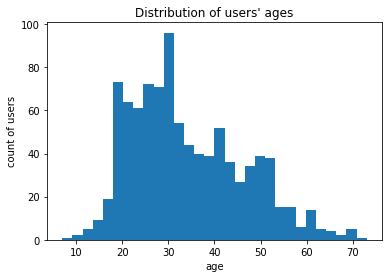

In [390]:
# Let's look at how these movies are viewed across different age groups.
# First, let's look at how age is distributed amongst our users.

import matplotlib.pyplot as plt 

users.age.plot.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');
plt.show()

In [391]:
# my trail 

def age_group (age):
    age_floor = age // 10
    lower = str(age_floor * 10)
    upper = str(age_floor * 10 + 9)
    return str(lower+'-'+upper)

dataset['age_group'] = dataset['age'].agg(age_group)
dataset.head()

user_id  movie_id  rating  unix_timestamp  age sex  occupation zip_cpde  \
0      196       242       3       881250949   49   M      writer    55105   
1      305       242       5       886307828   23   M  programmer    94086   
2        6       242       4       883268170   42   M   executive    98101   
3      234       242       4       891033261   60   M     retired    94702   
4       63       242       3       875747190   31   M   marketing    75240   

           name release_date  video_release_date  \
0  Kolya (1996)  24-Jan-1997                 NaN   
1  Kolya (1996)  24-Jan-1997                 NaN   
2  Kolya (1996)  24-Jan-1997                 NaN   
3  Kolya (1996)  24-Jan-1997                 NaN   
4  Kolya (1996)  24-Jan-1997                 NaN   

                                          imdb_url age_group  
0  http://us.imdb.com/M/title-exact?Kolya%20(1996)     40-49  
1  http://us.imdb.com/M/title-exact?Kolya%20(1996)     20-29  
2  http://us.imdb.com/M/title-exact?Kolya%20(1996)     40-49  
3  http://us.imdb.com/M/title-exact?Kolya%20(1996)     60-69  
4  http://us.imdb.com/M/title-exact?Kolya%20(1996)     30-39

In [392]:
# In blog

# labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
# dataset['age_group'] = pd.cut(dataset.age, range(0, 81, 10), right=False, labels=labels)
# dataset.head()

In [393]:
# Now we can now compare ratings across age groups.

dataset.groupby('age_group').agg({'rating': [np.size, np.mean]})

rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746

In [394]:
most_50 = dataset.groupby('movie_id').size().sort_values(ascending=False)[:50]

In [395]:
newdata = dataset.set_index('movie_id')
by_age = newdata.loc[most_50.index].groupby(['name', 'age_group'])
by_age['rating'].mean().unstack().fillna(0)

age_group                                     0-9     10-19     20-29  \
name                                                                    
Air Force One (1997)                          0.0  3.647059  3.666667   
Alien (1979)                                  0.0  4.111111  4.026087   
Aliens (1986)                                 0.0  4.050000  4.087719   
Apollo 13 (1995)                              4.0  3.954545  3.845455   
Back to the Future (1985)                     0.0  4.037037  3.720588   
Birdcage, The (1996)                          0.0  3.217391  3.413223   
Braveheart (1995)                             0.0  4.384615  4.194915   
Conspiracy Theory (1997)                      0.0  3.565217  3.382114   
Contact (1997)                                5.0  3.693878  3.785714   
Dead Man Walking (1995)                       0.0  3.647059  3.926606   
E.T. the Extra-Terrestrial (1982)             0.0  3.680000  3.609091   
Empire Strikes Back, The (1980)               4.0  4.642857  4.311688   
...                                           ...       ...       ...   
Shawshank Redemption, The (1994)              0.0  4.666667  4.585366   
Silence of the Lambs, The (1991)              0.0  4.095238  4.434211   
Star Trek: First Contact (1996)               0.0  3.576923  3.641975   
Star Wars (1977)                              3.0  4.630435  4.413043   
Terminator 2: Judgment Day (1991)             0.0  4.173913  3.969466   
Terminator, The (1984)                        0.0  3.619048  3.875969   
Titanic (1997)                                5.0  4.611111  4.336066   
Toy Story (1995)                              0.0  3.621622  3.920635   
Twelve Monkeys (1995)                         4.0  3.916667  3.847458   
Twister (1996)                                0.0  3.000000  3.200000   
When Harry Met Sally... (1989)                0.0  3.500000  4.000000   
Willy Wonka and the Chocolate Factory (1971)  0.0  3.387097  3.820144   

age_group                                        30-39     40-49     50-59  \
name                                                                         
Air Force One (1997)                          3.570000  3.555556  3.750000   
Alien (1979)                                  4.103448  3.833333  4.272727   
Aliens (1986)                                 3.887640  3.526316  4.235294   
Apollo 13 (1995)                              4.064935  3.822222  4.187500   
Back to the Future (1985)                     3.915789  4.036364  3.500000   
Birdcage, The (1996)                          3.514286  3.500000  3.346154   
Braveheart (1995)                             4.156627  4.051282  3.956522   
Conspiracy Theory (1997)                      3.419355  3.465116  3.538462   
Contact (1997)                                3.847458  3.866667  3.739130   
Dead Man Walking (1995)                       3.814286  3.754386  4.294118   
E.T. the Extra-Terrestrial (1982)             3.806818  4.160000  4.368421   
Empire Strikes Back, The (1980)               4.052083  4.100000  3.909091   
...                                                ...       ...       ...   
Shawshank Redemption, The (1994)              4.323944  4.378378  4.185185   
Silence of the Lambs, The (1991)              4.214876  4.133333  4.300000   
Star Trek: First Contact (1996)               3.737864  3.760000  3.272727   
Star Wars (1977)                              4.305732  4.166667  4.469388   
Terminator 2: Judgment Day (1991)             3.977011  4.212121  3.941176   
Terminator, The (1984)                        4.105882  3.975610  3.900000   
Titanic (1997)                                4.236111  3.984848  4.210526   
Toy Story (1995)                              4.033058  3.700000  3.758621   
Twelve Monkeys (1995)                         3.788462  3.653846  3.650000   
Twister (1996)                                3.133333  3.479167  3.300000   
When Harry Met Sally... (1989)                3.882353  3.825000  3.904762   


### Which movies do men and women most disagree on?

In [396]:
movies_MF = dataset.groupby(['movie_id', 'name', 'sex'])['rating'].mean().sort_values().unstack().fillna(0)
movies_MF['diff'] = movies_MF['M'] - movies_MF['F']
movies_MF.head()

sex                                F         M      diff
movie_id name                                           
1        Toy Story (1995)   3.789916  3.909910  0.119994
2        GoldenEye (1995)   3.368421  3.178571 -0.189850
3        Four Rooms (1995)  2.687500  3.108108  0.420608
4        Get Shorty (1995)  3.400000  3.591463  0.191463
5        Copycat (1995)     3.772727  3.140625 -0.632102

In [ ]:
# select most disagree movies from most_50 movies
movies_MF.reset_index('movie_id', inplace=True)
movies_MF.reset_index('name', inplace=True)

In [398]:
movies_MF.head()

sex               name  movie_id         F         M      diff
0     Toy Story (1995)         1  3.789916  3.909910  0.119994
1     GoldenEye (1995)         2  3.368421  3.178571 -0.189850
2    Four Rooms (1995)         3  2.687500  3.108108  0.420608
3    Get Shorty (1995)         4  3.400000  3.591463  0.191463
4       Copycat (1995)         5  3.772727  3.140625 -0.632102

In [405]:
difference = movies_MF[movies_MF['movie_id'].isin(most_50.index)][['name', 'diff']]
disagrees = difference.set_index('name')['diff']
disagrees.head()

name
Toy Story (1995)             0.119994
Twelve Monkeys (1995)        0.300315
Dead Man Walking (1995)     -0.043452
Mr. Holland's Opus (1995)   -0.244160
Braveheart (1995)            0.031136
Name: diff, dtype: float64

Text(0.5,1,'Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')

Text(0,0.5,'Title')

Text(0.5,0,'Average Rating Difference')

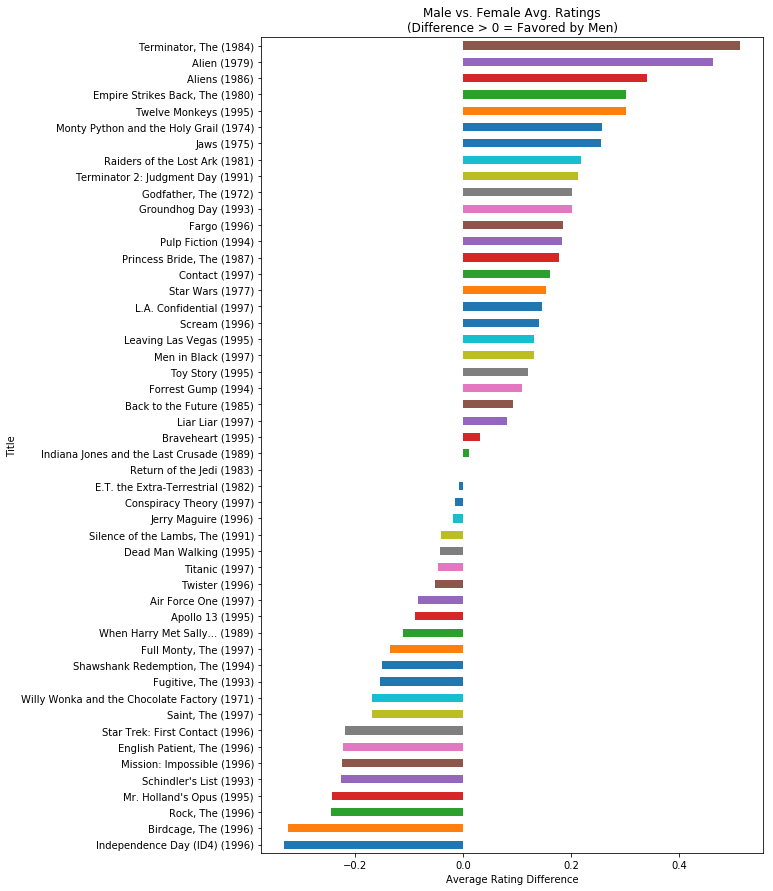

In [406]:
disagrees.sort_values().plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');
plt.show()